# Introduction

<Notice this is 'Markdown'>
<This is also how you put in comments.>
This is how to enter normal text. You can even use LaTeX in here, just by using standard TeX formatting. For example,

\begin{equation}
f(x)=x^2 - 3x +2.
\end{equation}

It's terribly easy. You should use this for all text in your report.

You can get different Heading/Section styles by using different numbers of # marks (up to six).

# One 
## Two
### Three
#### Four
##### Five
###### Six
####### Seven - Oops! Not a thing!

If you want to enter Python code, switch to code -> 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
%matplotlib inline

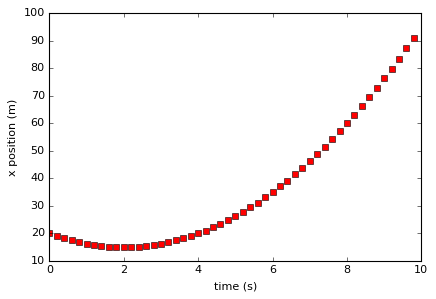

In [5]:
#create a time variable (Note in the code environment, # gives a comment!)
time=np.arange(0.,10.,0.2)*u.s

#let's look at a basic kinematic equation, setting some initial conditions (and constant acceleration)
xi=+20.0*u.m
vi=-5.0*u.m/u.s
ac=+2.5*u.m/u.s/u.s
xf=xi+vi*time+.5*ac*time**2.

#and make a plot - what does 'rs' do?
plt.plot(time, xf, 'rs')
plt.xlabel('time (s)')
plt.ylabel('x position (m)')
plt.show()

In [21]:
v=3.*10**4.*u.m/u.s
c=3.*10**8.*u.m/u.s
l=11.*u.m
t1=(2*l/c)*(1-(v/c)**2.)**(-1.)
t2=(2*l/c)*(1-(v/c)**2.)**(-1./2)
diff=c*2.*(t1-t2)
print(diff)

2.2000000768e-07 m
